#2024/1 - 1118003 - 1 - TÓPICOS ESPECIAIS EM COMPUTAÇÃO II
#Processamento de Linguagem Natural - PLN
#Guilherme Dallmann Lima

#Bibliotecas

In [1]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=0bd6e5ee1f776095082adfddd15a7c4689a9cf61fe0829b83180f92e7fc75511
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [2]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 1.7 MB/s eta 0:00:00


In [64]:
import wikipedia
import nltk as nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from unidecode import unidecode
from collections import Counter
nltk.download('punkt')
nltk.download('machado')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import machado
from nltk.text import Text
from nltk import pos_tag
from collections import Counter
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package machado to /root/nltk_data...
[nltk_data]   Package machado is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#Exercicio 1

#Crie um programa em Python que realiza a análise de frequência de tokens e types em um texto fornecido.


##Pré-Processamento

In [55]:
wikipedia.set_lang("pt")

page_title = "Python (linguagem de programação)"

page = wikipedia.page(page_title)

text = page.content[:1000]

In [ ]:
tokenization = word_tokenize(text)

lowerWords = [word.lower() for word in tokenization]
print(lowerWords)

cleanWords = [unidecode(word) for word in lowerWords]

cleanText = [re.sub(r'[^\w\s]', '', word) for word in cleanWords]

print(cleanText)

['python', 'é', 'uma', 'linguagem', 'de', 'programação', 'de', 'alto', 'nível', ',', 'interpretada', 'de', 'script', ',', 'imperativa', ',', 'orientada', 'a', 'objetos', ',', 'funcional', ',', 'de', 'tipagem', 'dinâmica', 'e', 'forte', '.', 'foi', 'lançada', 'por', 'guido', 'van', 'rossum', 'em', '1991', '.', 'atualmente', ',', 'possui', 'um', 'modelo', 'de', 'desenvolvimento', 'comunitário', ',', 'aberto', 'e', 'gerenciado', 'pela', 'organização', 'sem', 'fins', 'lucrativos', 'python', 'software', 'foundation', '.', 'apesar', 'de', 'várias', 'partes', 'da', 'linguagem', 'possuírem', 'padrões', 'e', 'especificações', 'formais', ',', 'a', 'linguagem', ',', 'como', 'um', 'todo', ',', 'não', 'é', 'formalmente', 'especificada', '.', 'o', 'padrão', 'na', 'pratica', 'é', 'a', 'implementação', 'cpython', '.', 'a', 'linguagem', 'foi', 'projetada', 'com', 'a', 'filosofia', 'de', 'enfatizar', 'a', 'importância', 'do', 'esforço', 'do', 'programador', 'sobre', 'o', 'esforço', 'computacional', '.',

##Análise de Frequência de Tokens e Types em um Texto


### Determinando o número total de types (palavras distintas)

In [ ]:
uniqueWords = set(cleanText)

totalTypes = len(uniqueWords)

print("Palavras únicas:", uniqueWords)

print("Número total de types:", totalTypes)

Palavras únicas: {'', 'uma', 'modelo', 'script', 'sem', 'de', 'projetada', 'rossum', 'terceiros', 'enfatizar', 'multiparadigma', 'pela', 'lancada', 'varias', 'paradigma', 'foi', 'proposito', 'especificacoes', 'do', 'possuirem', '1991', 'padrao', 'programador', 'velocidade', 'ou', 'orientado', 'implementacao', 'formais', 'legibilidade', 'da', 'formalmente', 'orientada', 'linguagem', 'funcion', 'funcional', 'organizacao', 'na', 'biblioteca', 'python', 'programacao', 'software', 'sintaxe', 'concisa', 'imperativo', 'comunitario', 'como', 'pratica', 'combina', 'por', 'modulos', 'dinamica', 'frameworks', 'importancia', 'alto', 'desenvolvimento', 'possui', 'um', 'guido', 'todo', 'codigo', 'sobre', 'fins', 'imperativa', 'gerenciado', 'objetos', 'partes', 'recursos', 'padroes', 'expressividade', 'computacional', 'o', 'interpretada', 'forte', 'em', 'com', 'filosofia', 'prioriza', 'atualmente', 'foundation', 'apesar', 'os', 'a', 'e', 'poderosos', 'cpython', 'esforco', 'nivel', 'geral', 'lucrativo

In [ ]:
tokenFrequency = Counter(cleanText)

mostCommonTokens = tokenFrequency.most_common()

print("Frequência dos tokens mais comuns:", mostCommonTokens)

Frequência dos tokens mais comuns: [('', 22), ('e', 10), ('de', 10), ('a', 9), ('linguagem', 5), ('python', 3), ('uma', 3), ('por', 3), ('o', 3), ('do', 3), ('alto', 2), ('nivel', 2), ('objetos', 2), ('foi', 2), ('um', 2), ('padrao', 2), ('com', 2), ('esforco', 2), ('sobre', 2), ('programacao', 1), ('interpretada', 1), ('script', 1), ('imperativa', 1), ('orientada', 1), ('funcional', 1), ('tipagem', 1), ('dinamica', 1), ('forte', 1), ('lancada', 1), ('guido', 1), ('van', 1), ('rossum', 1), ('em', 1), ('1991', 1), ('atualmente', 1), ('possui', 1), ('modelo', 1), ('desenvolvimento', 1), ('comunitario', 1), ('aberto', 1), ('gerenciado', 1), ('pela', 1), ('organizacao', 1), ('sem', 1), ('fins', 1), ('lucrativos', 1), ('software', 1), ('foundation', 1), ('apesar', 1), ('varias', 1), ('partes', 1), ('da', 1), ('possuirem', 1), ('padroes', 1), ('especificacoes', 1), ('formais', 1), ('como', 1), ('todo', 1), ('nao', 1), ('formalmente', 1), ('especificada', 1), ('na', 1), ('pratica', 1), ('impl

#Exercicio 2

#A biblioteca NLTK possui um corpus com textos de Machado de Assis de diferentes gêneros literários. Escolha três textos de gêneros literários diferentes e faça uma análise comparativa simples da frequência de POS (Part of Speech) tags dos tokens dos textos em cada gênero.


In [54]:
romance = machado.raw('romance/marm08.txt')
conto = machado.raw('contos/macn001.txt')
peca = machado.raw('teatro/matt01.txt')

print(romance)

Romance, Dom Casmurro, 1899

Dom Casmurro

Texto de referência:

Obras Completas de Machado de Assis,
vol. I,

Nova Aguilar, Rio de
Janeiro, 1994.

 Publicado originalmente
pela Editora Garnier, Rio de Janeiro, 1899.

CAPÍTULO PRIMEIRO

DO TÍTULO

Uma noite destas, vindo da cidade
para o Engenho Novo, encontrei no trem da Central um rapaz aqui do bairro, que
eu conheço de vista e de chapéu. Cumprimentou-me, sentou-se ao pé de mim, falou
da Lua e dos ministros, e acabou recitando-me versos. A viagem era curta, e os
versos pode ser que não fossem inteiramente maus. Sucedeu, porém, que, como eu
estava cansado, fechei os olhos três ou quatro vezes; tanto bastou para que ele
interrompesse a leitura e metesse os versos no bolso.

 Continue, disse eu acordando.

 Já acabei, murmurou ele.

 São muito bonitos.

Vi-lhe fazer um gesto para
tirá-los outra vez do bolso, mas não passou do gesto; estava amuado. No dia seguinte
entrou a dizer de mim nomes feios, e acabou alcunhando-me Dom Casmurro.

In [46]:
def post_tag(texto):
    tokens = word_tokenize(texto, language='portuguese')
    pos_tags = pos_tag(tokens, lang='eng')
    return pos_tags

def contar_pos_tags(pos_tags):
    tags = [tag for (token, tag) in pos_tags]
    contagem = Counter(tags)
    return contagem

def normalizar_contagem(contagem):
    total = sum(contagem.values())
    proporcoes = {tag: count / total for tag, count in contagem.items()}
    return proporcoes

In [49]:
romance_pos_tags = post_tag(romance)
conto_pos_tags = post_tag(conto)
teatro_pos_tags = post_tag(peca)

romance_contagem = contar_pos_tags(romance_pos_tags)
conto_contagem = contar_pos_tags(conto_pos_tags)
teatro_contagem = contar_pos_tags(teatro_pos_tags)

romance_proporcoes = normalizar_contagem(romance_contagem)
conto_proporcoes = normalizar_contagem(conto_contagem)
teatro_proporcoes = normalizar_contagem(teatro_contagem)

print("Contagem de POS tags para o romance:")
print(romance_contagem)

print("\nContagem de POS tags para o conto:")
print(conto_contagem)

print("\nContagem de POS tags para o teatro:")
print(teatro_contagem)

Contagem de POS tags para o romance:
Counter({'NN': 30525, 'JJ': 8653, 'NNP': 7067, ',': 6875, 'FW': 5645, '.': 4013, 'DT': 2779, 'IN': 2289, 'VBP': 1788, 'NNS': 1698, ':': 1669, 'VB': 1641, 'VBZ': 1054, 'CC': 1023, 'PRP': 526, 'RB': 473, 'VBD': 472, 'TO': 180, 'MD': 136, 'CD': 103, "''": 78, 'POS': 52, 'JJR': 40, '(': 27, ')': 27, 'EX': 22, 'UH': 20, 'PDT': 18, 'RP': 14, 'VBN': 10, '$': 6, 'PRP$': 5, 'RBS': 2, 'RBR': 2, 'JJS': 1})

Contagem de POS tags para o conto:
Counter({'NN': 25620, 'JJ': 7708, 'NNP': 7120, '.': 4729, 'FW': 4115, ',': 3393, 'DT': 2402, 'IN': 1911, ':': 1588, 'VB': 1475, 'VBP': 1470, 'NNS': 1230, 'VBZ': 1060, 'CC': 1028, 'VBD': 505, 'RB': 364, 'PRP': 250, 'TO': 133, 'MD': 95, 'UH': 32, 'JJR': 31, "''": 30, 'CD': 25, '(': 20, ')': 20, 'PDT': 12, 'RP': 10, 'NNPS': 8, 'PRP$': 5, 'POS': 5, 'VBN': 4, 'EX': 4, 'RBS': 2, '$': 1, 'RBR': 1})

Contagem de POS tags para o teatro:
Counter({'NN': 3234, 'NNP': 2012, ':': 1065, '.': 999, 'JJ': 962, 'FW': 419, ',': 381, 'DT': 264

In [50]:
print("\nProporções de POS tags para o romance:")
print(romance_proporcoes)

print("\nProporções de POS tags para o conto:")
print(conto_proporcoes)

print("\nProporções de POS tags para o teatro:")
print(teatro_proporcoes)


Proporções de POS tags para o romance:
{'NN': 0.38672038310972595, ',': 0.08709918538507341, 'NNP': 0.08953162808964565, 'CD': 0.0013049041592236453, 'FW': 0.07151634930890756, ':': 0.021144514968390912, '.': 0.05084058632004358, 'PRP': 0.006663879492734344, 'IN': 0.02899927786857208, 'JJ': 0.10962461834720585, 'RB': 0.005992423954493051, 'NNS': 0.02151191516856068, 'VBZ': 0.013353096930307983, 'DT': 0.03520707435419913, 'VBP': 0.02265212268632891, 'CC': 0.012960358785298925, 'VB': 0.020789783740640798, 'POS': 0.0006587865658216462, 'TO': 0.0022804150355364675, 'VBD': 0.005979754982073404, 'MD': 0.0017229802490719979, 'EX': 0.0002787173932322349, 'PDT': 0.00022804150355364676, "''": 0.0009881798487324693, '(': 0.00034206225533047017, ')': 0.00034206225533047017, 'JJR': 0.0005067588967858817, 'RP': 0.00017736561387505858, 'PRP$': 6.334486209823522e-05, 'RBS': 2.5337944839294085e-05, 'VBN': 0.00012668972419647043, 'UH': 0.00025337944839294086, 'RBR': 2.5337944839294085e-05, 'JJS': 1.266

##POS Tag é a atribuição de uma categoria gramatical específica (como substantivo, verbo, adjetivo, etc.) a cada palavra em um texto, com base em suas características morfológicas, sintáticas e contextuais.

#Exercicio 3

#Implemente um programa em Python que leia um texto, conte a frequência de cada token (palavra), e visualize a distribuição de frequência dos tokens, tentando observar a curva de Zipf.

##1. Pré-processe um texto de sua preferência (i.e., converta o texto em tokens (palavras), remova pontuações e converta todos os tokens para minúsculas; opcional: Remova stopwords.


In [83]:
wikipedia.set_lang("pt")

page_title = "Python (linguagem de programação)"

page = wikipedia.page(page_title)

text = page.content[:400]

tokenization = word_tokenize(text)

lowerWords = [word.lower() for word in tokenization]
print(lowerWords)

cleanWords = [unidecode(word) for word in lowerWords]

cleanText = [re.sub(r'[^\w\s]', '', word) for word in cleanWords]

print(cleanText)

['python', 'é', 'uma', 'linguagem', 'de', 'programação', 'de', 'alto', 'nível', ',', 'interpretada', 'de', 'script', ',', 'imperativa', ',', 'orientada', 'a', 'objetos', ',', 'funcional', ',', 'de', 'tipagem', 'dinâmica', 'e', 'forte', '.', 'foi', 'lançada', 'por', 'guido', 'van', 'rossum', 'em', '1991', '.', 'atualmente', ',', 'possui', 'um', 'modelo', 'de', 'desenvolvimento', 'comunitário', ',', 'aberto', 'e', 'gerenciado', 'pela', 'organização', 'sem', 'fins', 'lucrativos', 'python', 'software', 'foundation', '.', 'apesar', 'de', 'várias', 'partes', 'da', 'linguagem', 'possuírem', 'padrões', 'e', 'espe']
['python', 'e', 'uma', 'linguagem', 'de', 'programacao', 'de', 'alto', 'nivel', '', 'interpretada', 'de', 'script', '', 'imperativa', '', 'orientada', 'a', 'objetos', '', 'funcional', '', 'de', 'tipagem', 'dinamica', 'e', 'forte', '', 'foi', 'lancada', 'por', 'guido', 'van', 'rossum', 'em', '1991', '', 'atualmente', '', 'possui', 'um', 'modelo', 'de', 'desenvolvimento', 'comunitario

##2. Contabilize a frequência de cada token no texto.


In [84]:
uniqueWords = set(cleanText)

totalTypes = len(uniqueWords)

print("Palavras únicas:", uniqueWords)

print("Número total de types:", totalTypes)

Palavras únicas: {'', 'lucrativos', 'linguagem', 'dinamica', 'foi', 'por', 'varias', 'um', 'uma', 'sem', 'a', 'possuirem', 'rossum', 'em', 'aberto', 'partes', 'de', 'pela', 'software', 'modelo', 'nivel', 'guido', 'atualmente', 'forte', 'objetos', 'organizacao', 'espe', 'script', 'apesar', 'da', 'interpretada', 'gerenciado', 'lancada', 'e', 'van', 'foundation', 'padroes', 'orientada', 'imperativa', 'fins', 'desenvolvimento', 'programacao', 'python', 'funcional', 'comunitario', '1991', 'possui', 'tipagem', 'alto'}
Número total de types: 49


##3. Ordene os tokens por frequência em ordem decrescente.


In [85]:
tokenFrequency = Counter(cleanText)

mostCommonTokens = tokenFrequency.most_common()

print("Frequência dos tokens mais comuns:", mostCommonTokens)

Frequência dos tokens mais comuns: [('', 10), ('de', 6), ('e', 4), ('python', 2), ('linguagem', 2), ('uma', 1), ('programacao', 1), ('alto', 1), ('nivel', 1), ('interpretada', 1), ('script', 1), ('imperativa', 1), ('orientada', 1), ('a', 1), ('objetos', 1), ('funcional', 1), ('tipagem', 1), ('dinamica', 1), ('forte', 1), ('foi', 1), ('lancada', 1), ('por', 1), ('guido', 1), ('van', 1), ('rossum', 1), ('em', 1), ('1991', 1), ('atualmente', 1), ('possui', 1), ('um', 1), ('modelo', 1), ('desenvolvimento', 1), ('comunitario', 1), ('aberto', 1), ('gerenciado', 1), ('pela', 1), ('organizacao', 1), ('sem', 1), ('fins', 1), ('lucrativos', 1), ('software', 1), ('foundation', 1), ('apesar', 1), ('varias', 1), ('partes', 1), ('da', 1), ('possuirem', 1), ('padroes', 1), ('espe', 1)]


##4. Plote a frequência dos tokens utilizando um gráfico de linha, onde o eixo X representa o rank do token (posição) e o eixo Y representa a frequência.

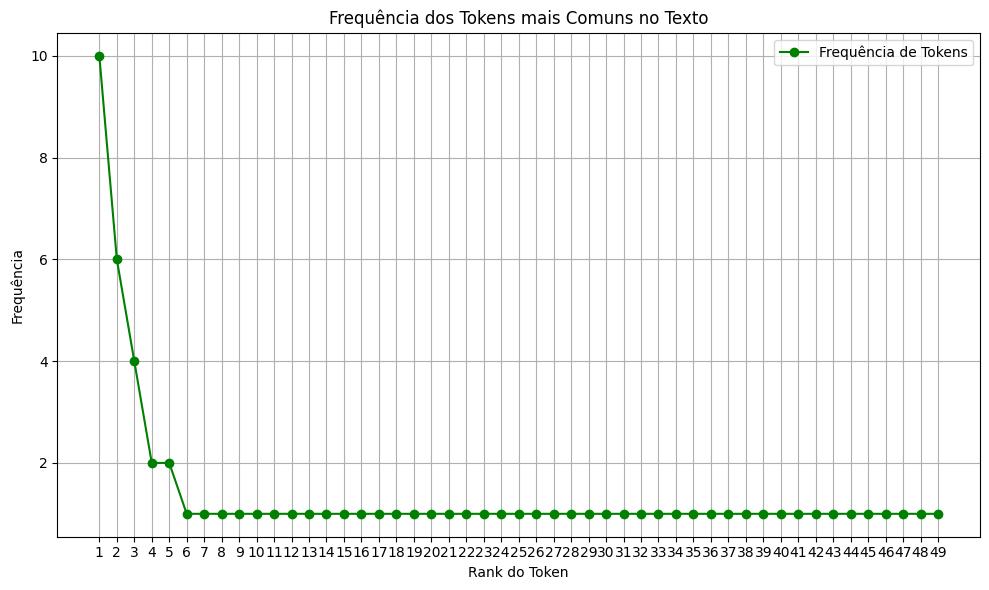

In [86]:
ranks = range(1, len(mostCommonTokens) + 1)
frequencias = [freq for token, freq in mostCommonTokens]

plt.figure(figsize=(10, 6))
plt.plot(ranks, frequencias, marker='o', linestyle='-', color='g', label='Frequência de Tokens')
plt.title('Frequência dos Tokens mais Comuns no Texto')
plt.xlabel('Rank do Token')
plt.ylabel('Frequência')
plt.xticks(range(1, len(mostCommonTokens) + 1, 1))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

##5. Analise o gráfico gerado para observar se a distribuição de frequência segue a curva de Zipf.


###A lei de Zipf afirma que, em muitos conjuntos de dados linguísticos, a frequência de qualquer palavra é inversamente proporcional à sua posição no ranking de frequência. Ou seja, se o token mais frequente tem rank 1, sua frequência é aproximadamente duas vezes a do token classificado como 2º, três vezes a do 3º e assim por diante.

###Ao analisarmos o gráfico é possível inferir que o mesmo está se comportando conforme a lei de Zipf, o primeiro token tem aproximadamente duas vezes a frequência do segundo token e assim por diante.